In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, fbeta_score, classification_report, accuracy_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from joblib import dump, load

In [2]:
X_train = pd.read_csv('X_train_Kickstarter.csv')
X_test = pd.read_csv('X_test_Kickstarter.csv')
y_train = pd.read_csv('y_train_Kickstarter.csv')
y_test = pd.read_csv('y_test_Kickstarter.csv')

In [3]:
y_train = y_train.state

In [4]:
y_test = y_test.state

In [5]:
dummy_clf = DummyClassifier(strategy = 'most_frequent')

In [6]:
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [7]:
y_pred = dummy_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22545
           1       0.61      1.00      0.76     35190

    accuracy                           0.61     57735
   macro avg       0.30      0.50      0.38     57735
weighted avg       0.37      0.61      0.46     57735



/Users/danielmuller/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielmuller/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielmuller/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

<AxesSubplot:>

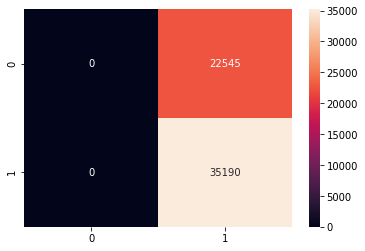

In [8]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cnf_matrix, annot = True, fmt = "g")

In [9]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [10]:
clf = svm.SVC(kernel='linear', verbose = 5)

In [11]:
#clf.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', verbose=5)

In [18]:
dump(clf, 'clfSVM.pickle')

['clfSVM.pickle']

In [20]:
svm = load('clfSVM.pickle')

In [21]:
y_pred = svm.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68     22545
           1       0.80      0.75      0.78     35190

    accuracy                           0.74     57735
   macro avg       0.72      0.73      0.73     57735
weighted avg       0.74      0.74      0.74     57735



In [29]:
accuracy_score(y_test, y_pred)

0.735862128691435

### Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
model = RandomForestClassifier(n_estimators=120, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [17]:
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   33.7s finished


RandomForestClassifier(max_features='sqrt', n_estimators=120, n_jobs=-1,
                       random_state=42, verbose=1)

In [18]:
y_pred = model.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    1.4s finished


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     22545
           1       0.83      0.86      0.84     35190

    accuracy                           0.80     57735
   macro avg       0.79      0.79      0.79     57735
weighted avg       0.80      0.80      0.80     57735



In [16]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)